In [11]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image

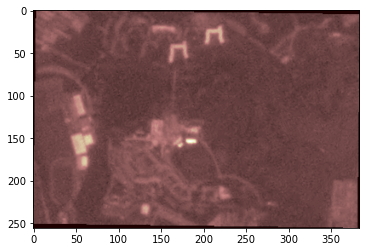

In [24]:
src = rasterio.open('C:/Users/daa5/OneDrive - University of Stirling/PlanetData/\
airthrey-18-20-jun-22-SurfaceReflectance_psscene_analytic_8b_sr_udm2/files/\
20220620_102924_31_2423_3B_AnalyticMS_SR_8b_clip.tif')

src1 = rasterio.open('C:/Users/daa5/OneDrive - University of Stirling/PlanetData/\
airthrey-18-20-jun-22-SurfaceReflectance_psscene_analytic_8b_sr_udm2/files/\
20220618_105818_44_249a_3B_AnalyticMS_SR_8b_clip.tif')

array = src1.read(1)
plt.imshow(array, cmap='pink')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 384, 3)


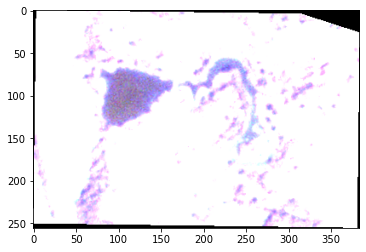

In [30]:
data = src.read()
image = reshape_as_image(data)
print(image[:, :, 2::2].shape)

plt.imshow(image[:, :, 2::2])

In [25]:
data = src1.read()
image = reshape_as_image(data)
print(image[:, :, 2::2].shape)

image.shape

(256, 384, 3)


(256, 384, 8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


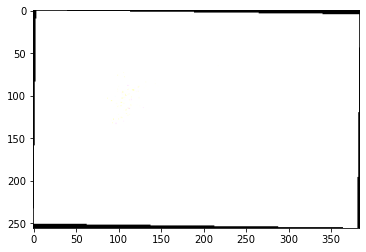

In [28]:
plt.imshow(image[:, :, 2::2])

In [47]:
for i in range(data.shape[1]):
    for j in range(data.shape[2]):
        plt.plot(data[:, i, j]/((2**16)), 'o-')

Error in callback <function flush_figures at 0x0000022DE003DCF0> (for post_execute):


KeyboardInterrupt: 

In [113]:
# this is actually really important code!! - using LineCollection makes plotting lots of lines way way faster! 

segs = data.reshape((data.shape[0], data.shape[1]* data.shape[2])).T.astype(np.float64)/(2**16)
x = np.arange(8)
x2 = np.broadcast_to(x, (segs.shape[0], 8))

segs = np.stack([x2, segs], axis=2)
segs.shape

(98304, 8, 2)

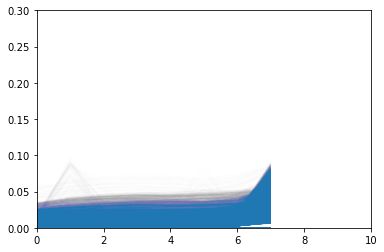

In [119]:
from matplotlib.collections import LineCollection
line_segments = LineCollection(segs, alpha=0.002)
fig, ax = plt.subplots()
ax.add_collection(line_segments)
ax.set_ylim(0, 0.3)
ax.set_xlim(0, 10)

plt.show()

In [105]:
np.max(segs)

0.0978546142578125